# Modelo matemático de un dron quadcopter

El modelaje se va a realizar consideranco que el mismo consiste en un cuerpo rígido (simétrico en el plano xy) unido a otros 4 cuerpos rígidos mucho más pequeños, los cuales son los 4 rotores/hélices del dron. Dichas 4 hélices giran en pares, es decir, dos rotores giran de forma horaria y dos en forma antihoraria, generando la fuerzas que utiliza el dron para movilizarse. Las fuerza que genera la rotación de cada hélice se considerará proporcional a la velocidad de rotación del rotor en cuestión.

Además, se considera fricción con el viente en dos formas, una en un régimen lineal con la velocidad translacional del dron y la otra cuadrática con la velocidad de rotación. 

Por el momento se realizarán las consideraciones dinámicas completas.

# Mecánica del cuerpo rígido

Para modelar un cuerpo rígido se requiere modelar la translación de su centro de masa utilizando las leyes de Newton y hay que modelar como se orienta el cuerpo (como "gira" en el espacio por el que se mueve, cambiando su orientación), por lo cuál se deberán obtener 6 ecuaciones diferenciales de segundo orden que describen la totalidad del movimiento. 

Se propone los siguientes vectores para describir la posición y orientación del cuerpo:

$$\vec{\xi} = \begin{pmatrix} 
					x \\
					y \\
					z \\
					\end{pmatrix}
$$

$$\vec{\eta} = \begin{pmatrix} 
					\phi \\
					\theta \\
					\psi \\
					\end{pmatrix}
$$

Donde $\phi$,$\theta$ y $\psi$ son los ángulos de Tait-Bryan, también conocidos como los ángulos de Euler o solo como "yaw, pitch and roll". En está ocasión se define que $\phi$ es la rotación en el eje x, $\theta$ la rotación en el eje y y $\psi$ es la rotación en el eje z. Al ser ángulos de Tait-Bryan estos se definen desde el marco de referencia inercial en el suelo.

Se coloca un marco de referencia inercial en el suelo y un marco de referencia no inercial que sigue al cuerpo y su orientación, en el centro de masa del cuerpo.

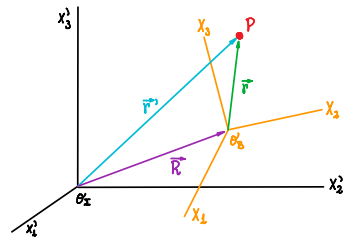

Para convertir entre los marcos de referencia, se utiliza la transformación galileana tomando en cuenta que el marco de referencia no inercial (de ahora en adelante llamado marco de referencia del cuerpo) puede tener una orientación arbitraria, se introduce una matriz de rotación ortogonal R que permite pasar un vector de la orientación del marco inercial a la orientación del marco del cuerpo:

$$\vec{r}' = R^{-1} \vec{r} + \vec{R}  \Leftrightarrow \vec{r} = R \left( \vec{r}' -\vec{R} \right)$$

Donde R es:

$$

R = \begin{bmatrix}
		cos\left( \psi\right) cos\left( \theta\right) & sin\left( \psi\right) cos\left( \theta\right) & -sin\left( \theta \right) \\

		cos\left( \psi\right)sin\left( \theta\right)sin\left( \phi\right)-sin\left( \psi\right)cos\left( \phi\right) & sin\left( \psi\right)sin\left( \theta\right)sin\left( \phi\right) + cos\left( \psi\right)cos\left( \phi\right) & cos\left( \theta\right)sin\left( \phi\right) \\

		cos\left( \psi\right)sin\left( \theta\right)cos\left( \phi\right)+sin\left( \psi\right)sin\left( \phi\right) & sin\left( \psi\right)sin\left( \theta\right)cos\left( \phi\right) - cos\left( \psi\right)sin\left( \phi\right) & cos\left( \theta\right)cos\left( \phi\right)


	\end{bmatrix}

	= R_{x}\left( \phi \right) R_{y}\left( \theta \right) R_{z}\left( \psi \right)

$$


$$
\begin{align*}
R_{x}\left( \phi \right) = \begin{bmatrix}
								1 & 0 & 0\\
								0 & cos\left( \phi \right) & sin\left( \phi \right) \\
								0 & -sin\left( \phi \right) & cos\left( \phi \right)
							\end{bmatrix}

\;\;
& 
\;\;

R_{y}\left( \theta \right) = \begin{bmatrix}
								cos\left( \theta \right) & 0 & -sin\left( \theta \right) \\
								0 & 1 & 0 \\
								sin\left( \theta \right) & 0 & cos\left( \theta \right)
							\end{bmatrix}

\;\;
& 
\;\;

R_{z}\left( \psi \right) = \begin{bmatrix}
								cos\left( \psi \right) & sin\left( \theta \right) & 0\\
								-sin\left( \theta \right) & cos\left( \psi \right) & 0 \\
								0 & 0 & 1
							\end{bmatrix}

\end{align*}
$$

Recordar que son matrices de rotación (pasiva) ortogonales


## Por otro lado

El marco de referencia del cuerpo tendrá asociado un vector de velocidades angulares y este se debe relacionar, según las convención de ángulos de Euler, a la derivada del vector de orientación en el marco inercial, para hacer esto de debe hacer la derivada temporal de la transformación galileana:

$$ 
\begin{align*}
\dot{\vec{r}} &= \dot{R} \left( \vec{r}' - \vec{R}\right) +R \left( \dot{\vec{r}'} - \dot{\vec{R}}\right) \\
&= \dot{R} R^{T} R \left( \vec{r}' - \vec{R}\right) + R \left( \dot{\vec{r}'} - \dot{\vec{R}}\right) \\
&= \dot{R} R^{T} R \vec{r} + R \left( \dot{\vec{r}'} - \dot{\vec{R}}\right) \\

\Rightarrow \dot{R} R^{T} &= \hat{\omega}^{T}_{x} \Rightarrow \hat{\omega}_{x} = R \dot{R}^{T} \to \hat{\omega}_{x} \vec{A} = \vec{\omega} \times \vec{A}
\end{align*}
$$

$$\vec{\omega} = W \dot{\vec{\eta}}$$


$$
\begin{align*}

W = \begin{bmatrix}
		1 & 0 & -sin\left( \theta \right) \\
		0 & cos\left( \phi \right) & cos\left( \theta \right) sin\left( \phi \right) \\
		0 & -sin\left( \phi \right) & cos\left( \theta \right) cos\left( \phi \right)
	\end{bmatrix}

\;\;
&
\;\;

W^{-1} = \begin{bmatrix}
			1 & sin\left( \phi \right) tan\left( \theta \right) & cos\left( \phi \right)tan\left( \theta \right) \\
			0 & cos\left( \phi \right) & -sin\left( \phi \right) \\
			0 & sin\left( \phi \right)sec\left( \theta \right) & cos\left( \phi \right) sec\left( \theta \right)
		\end{bmatrix}

\end{align*}

$$
Esta matriz de transformación NO es ortogonal, la inversa NO existe si $\theta = \frac{n \pi}{2}$ con $n \epsilon \mathbb{N}\setminus\begin{Bmatrix}
0\end{Bmatrix}$

In [913]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import control as ctl
from funciones import convert_sympy_tf_matrix

plt.style.use(['science','notebook', 'grid'])
from sympy.physics.mechanics import dynamicsymbols, mechanics_printing
mechanics_printing()

# Definición de las variables simbólicas

In [914]:
x, y, z, phi,theta, psi, omx,omy,omz = dynamicsymbols(r'x,y,z,\phi,\theta, \psi, \omega_{x}^{B},\omega_{y}^{B},\omega_{z}^{B}')
t = dynamicsymbols._t

om1,om2,om3,om4 = dynamicsymbols(r'\omega_1, \omega_2, \omega_3 , \omega_4')

k, b, cx,cy,cz , l , Icxx, Icyy, Iczz , Irxx, Iryy , Irzz, g, M = smp.symbols(r'k, b,c_x, c_y, c_z, l, I_{cxx},I_{cyy},I_{czz}, I_{rxx}, I_{ryy}, I_{rzz}, g, M', positive = True)
T, Nx,Ny,Nz = smp.symbols(r'T^{B},N_{x}^{B},N_{y}^{B},N_{z}^{B}')

In [915]:
Icuerpo = smp.Matrix([[Icxx,0,0],[0,Icyy,0],[0,0,Iczz]])
Irotor = smp.Matrix([[Irxx,0,0],[0,Iryy,0],[0,0,Irzz]])

# Fuerzas y Torques que siente el sistema (Cuerpo del dron + los 4 rotores)

'Fuerza y torques generados por las hélices:'

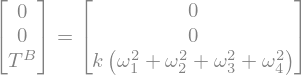

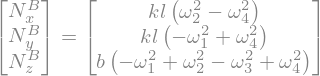

In [916]:
# Todos en el marco del cuerpo
Tv = smp.Matrix([0,0,k*(om1**2 + om2**2 + om3**2 + om4**2)]) # Empuje total generado por las hélices
Nxv = l*k*(om2**2-om4**2) # Torque alrededor del eje x
Nyv = l*k*(-om1**2 + om4**2) # Torque alrededor del eje y
Nzv = b*(-om1**2 + om2**2 -om3**2 + om4**2) # Torque alrededor del eje z
N = smp.Matrix([Nxv,Nyv,Nzv]) # Vector de torques generados por las hélices

fuerza = smp.Eq(smp.Matrix([0,0,T]), Tv)
torque_x = smp.Eq(Nx, Nxv)
torque_y = smp.Eq(Ny, Nyv)
torque_z = smp.Eq(Nz, Nzv)
torque = smp.Eq(smp.Matrix([Nx,Ny,Nz]), N)

display("Fuerza y torques generados por las hélices:")
display(fuerza)
display(torque_x)
display(torque_y)
display(torque_z)
display(torque)

In [917]:
print(smp.latex(fuerza))

\left[\begin{matrix}0\\0\\T^{B}\end{matrix}\right] = \left[\begin{matrix}0\\0\\k \left(\omega_{1}^{2}{\left(t \right)} + \omega_{2}^{2}{\left(t \right)} + \omega_{3}^{2}{\left(t \right)} + \omega_{4}^{2}{\left(t \right)}\right)\end{matrix}\right]


In [918]:
# Posición del centro de masa, velocidad y aceleración en marco inercial

rp = smp.Matrix([x,y,z]) # Posición del centro de masa
drp = smp.diff(rp, t) # Velocidad del centro de masa
ddrp = smp.diff(rp, t, 2) # Aceleración del centro de masa

# Velocidad y Aceleración angular desde el marco del cuerpo

omega = smp.Matrix([omx,omy,omz]) # Velocidad angular del cuerpo
domega = smp.diff(omega, t) # Aceleración angular del cuerpo

omega_rotor = 4*omega+smp.Matrix([0,0,om1-om2+om3-om4])
# Vector orientación

eta = smp.Matrix([phi, theta, psi]) # Ángulos de Euler ----> Tait-Bryan (YXZ)
deta = smp.diff(eta, t) # Derivada de los ángulos de Euler

# Relación entre los angulos de Euler derivados respecto al tiempo y las velocidades angulares del cuerpo

W = smp.Matrix( [[1,0,-smp.sin(theta)],
				[0, smp.cos(phi),smp.cos(theta)*smp.sin(phi)],
				[0, -smp.sin(phi), smp.cos(theta)*smp.cos(phi)]]) # Matriz de transformación entre deta y omega (omega = W*deta)

W_inv = W.inv().applyfunc(smp.simplify) # Inversa de la matriz W, relacionada deta con omega (deta = W^-1*omega)

aux1 = W_inv*omega 

# Matriz de rotación, pasa del marco de inercial con el marco del cuerpo
R = smp.Matrix([[smp.cos(psi)*smp.cos(theta),smp.cos(theta)*smp.sin(psi),-smp.sin(theta)],
				[smp.cos(psi)*smp.sin(phi)*smp.sin(theta)-smp.cos(phi)*smp.sin(psi), smp.cos(phi)*smp.cos(psi)+smp.sin(phi)*smp.sin(psi)*smp.sin(theta),smp.cos(theta)*smp.sin(phi)],
				[smp.sin(phi)*smp.sin(psi)+smp.cos(phi)*smp.cos(psi)*smp.sin(theta),smp.cos(phi)*smp.sin(psi)*smp.sin(theta)-smp.cos(psi)*smp.sin(phi),smp.cos(phi)*smp.cos(theta)]])

# Ecuaciones del movimiento

## Ecuaciones generales
Sin suposiciones geométricas

'Ecuaciones generales del movimiento del cuadricóptero:'

'Orientación:'

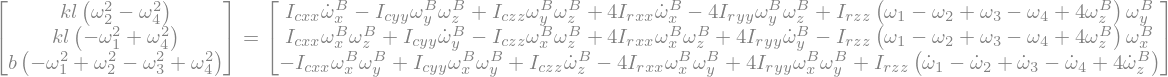

'Posición:'

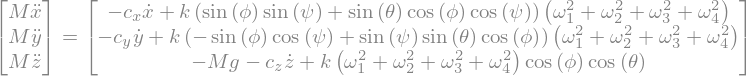

In [919]:
orientacion = smp.Eq(N, omega.cross(Icuerpo*omega) + Icuerpo*domega + omega.cross(Irotor*omega_rotor) + Irotor*smp.diff(omega_rotor,t))
posicion = smp.Eq(M*ddrp, R.T*Tv - smp.Matrix([cx*drp[0], cy*drp[1], cz*drp[2]]) - smp.Matrix([0,0,M*g]))

display("Ecuaciones generales del movimiento del cuadricóptero:")
display("Orientación:")
display(orientacion)
display("Posición:")
display(posicion)

## Ecuaciones del movimiento simplificadas

'Ecuaciones generales del movimiento del cuadricóptero:'

'Orientación:'

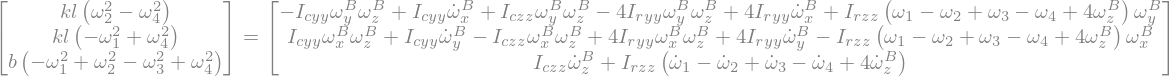

'Posición:'

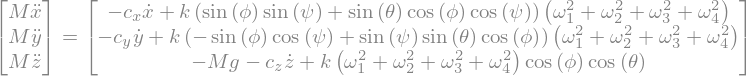

In [920]:
orientacion = orientacion.subs([(Irxx,Iryy),(Icxx,Icyy)])

display("Ecuaciones generales del movimiento del cuadricóptero:")
display("Orientación:")
display(orientacion)
display("Posición:")
display(posicion)

'Ecuaciones del movimiento simplificadas:'

'Orientación:'

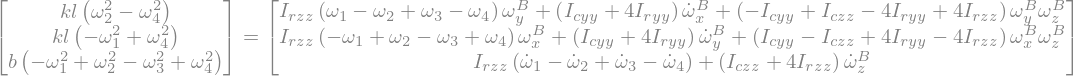

'Posición:'

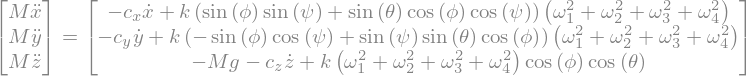

In [921]:
vars_to_collect = list(omega) +[omy*omz, omx*omz, Irzz*omy, Irzz*omx]+ list(domega) + list(Irotor)

aux2 = (orientacion.rhs).applyfunc(lambda e: smp.collect(smp.expand(e), vars_to_collect))
orientacion = smp.Eq(orientacion.lhs, aux2)

display("Ecuaciones del movimiento simplificadas:")
display("Orientación:")
display(orientacion)
display("Posición:")
display(posicion)

In [922]:
print(smp.latex(posicion))

\left[\begin{matrix}M \frac{d^{2}}{d t^{2}} x{\left(t \right)}\\M \frac{d^{2}}{d t^{2}} y{\left(t \right)}\\M \frac{d^{2}}{d t^{2}} z{\left(t \right)}\end{matrix}\right] = \left[\begin{matrix}- c_{x} \frac{d}{d t} x{\left(t \right)} + k \left(\sin{\left(\phi{\left(t \right)} \right)} \sin{\left(\psi{\left(t \right)} \right)} + \sin{\left(\theta{\left(t \right)} \right)} \cos{\left(\phi{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} \right)}\right) \left(\omega_{1}^{2}{\left(t \right)} + \omega_{2}^{2}{\left(t \right)} + \omega_{3}^{2}{\left(t \right)} + \omega_{4}^{2}{\left(t \right)}\right)\\- c_{y} \frac{d}{d t} y{\left(t \right)} + k \left(- \sin{\left(\phi{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} \right)} + \sin{\left(\psi{\left(t \right)} \right)} \sin{\left(\theta{\left(t \right)} \right)} \cos{\left(\phi{\left(t \right)} \right)}\right) \left(\omega_{1}^{2}{\left(t \right)} + \omega_{2}^{2}{\left(t \right)} + \omega_{3}^{2}{\left(t \right)} + \omega

# Las ecuaciones del movimiento escritas en términos de la fuerza neta y los torques netos
De acuerdo como lo realiza la literatura, las entradas son las fuerzas y los torques en cada eje

'Ecuaciones del movimiento escritas en términos de la fuerza neta y los torques netos:'

'Orientación:'

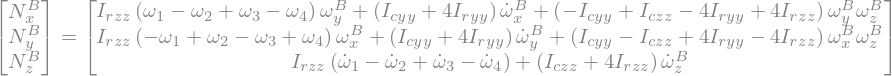

'Posición:'

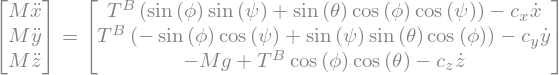

In [923]:
aux2 = (posicion.rhs).applyfunc(lambda e: e.subs([(k*(om1**2 + om2**2 + om3**2 + om4**2),T)]))
aux3 = (orientacion.lhs).applyfunc(lambda e: e.subs([(l*k*(om2**2-om4**2),Nx),(l*k*(-om1**2 + om4**2),Ny),(b*(-om1**2 + om2**2 -om3**2 + om4**2),Nz)]))
posicion = smp.Eq(posicion.lhs, aux2)
orientacion = smp.Eq(aux3,orientacion.rhs)

display("Ecuaciones del movimiento escritas en términos de la fuerza neta y los torques netos:")
display("Orientación:")
display(orientacion)
display("Posición:")
display(posicion)

'Ecuaciones del movimiento escritas en términos de las aceleraciones angulares:'

'Orientación:'

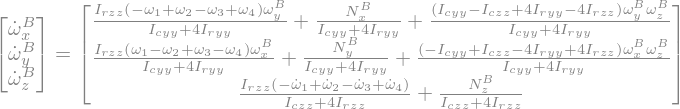

'Posición:'

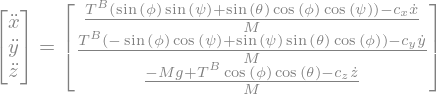

In [924]:
sol_orientacion =smp.solve(orientacion.rhs-orientacion.lhs, domega)
orientacion = smp.Eq(domega, smp.Matrix([sol_orientacion[domega[0]], sol_orientacion[domega[1]], sol_orientacion[domega[2]]]))
vars_to_collect = [Irzz*omy/(Icyy+4*Iryy), omy*omz/(Icyy+4*Iryy), Irzz*omx/(Icyy+4*Iryy), omx*omz/(Icyy+4*Iryy), Irzz/(Iczz+4*Irzz)]

aux2 = (orientacion.rhs).applyfunc(lambda e: smp.collect(smp.expand(e), vars_to_collect))
orientacion = smp.Eq(orientacion.lhs, aux2)

posicion = smp.Eq(ddrp, posicion.rhs/M)
display("Ecuaciones del movimiento escritas en términos de las aceleraciones angulares:")
display("Orientación:")
display(orientacion)
display('Posición:')
display(posicion)

'Ecuaciones del movimiento escritas en términos de contantes y las fuerzas y toques como entradas:'

'Orientación:'

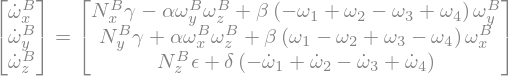

'Posición:'

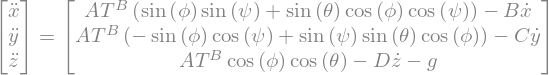

In [925]:
A,B,C,D, alpha, beta, gamma, delta, epsilon = smp.symbols(r'A,B,C,D, \alpha, \beta, \gamma, \delta, \epsilon', positive = True)
substitutions = [1/M,cx/M,cy/M,cz/M,(Iczz-Icyy+4*Irzz-4*Iryy)/(Icyy+4*Iryy),(-Iczz+Icyy-4*Irzz+4*Iryy)/(Icyy+4*Iryy) , Irzz/(Icxx+4*Irxx), Irzz/(Icyy+4*Iryy),1/(Icxx+4*Irxx),1/(Icyy+4*Iryy),Irzz/(Iczz+4*Irzz), 1/(Iczz+4*Irzz)]
# A,B,C,D, alpha, alpha, beta, beta, gamma, gamma, delta, epsilon

substitutions_list = [


	(substitutions[1],  B),
	(substitutions[2],  C),
	(substitutions[3],  D),

	(substitutions[0],  A),
	
	(substitutions[4],  alpha),
	(substitutions[5],  -alpha),
	(substitutions[6],  beta),
	(substitutions[7],  beta),
	
	(substitutions[10], delta),
	(substitutions[11], epsilon),
	(substitutions[8],  gamma),
	(substitutions[9],  gamma)
]

orientacion = (orientacion).subs(substitutions_list)
posicion = (posicion.expand()).subs(substitutions_list)

posicion = smp.Eq(ddrp, posicion.rhs.applyfunc(lambda e: smp.collect(smp.expand(e), A*T)))

display("Ecuaciones del movimiento escritas en términos de contantes y las fuerzas y toques como entradas:")
display("Orientación:")
display(orientacion)
display("Posición:")
display(posicion)


# Análisis del sistema 

Con el propósito de analizar el sistema (dron)  en los dominios del tiempo y de la frecuencia,y generar un controlador de trayectoría, se van a despreciar algunos efectos mostrados en las ecuaciones anteriores:

- Los efectos del "torque de precesión" ($\beta=0$)
- Los cambios en la velocidad angular intrínseca de los rotores ($\dot{\omega}_{i} =0$ con $i={1,2,3,4}$ )

'Ecuaciones del movimiento escritas en términos de contantes y las fuerzas y toques como entradas:'

'Orientación:'

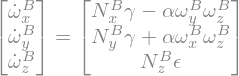

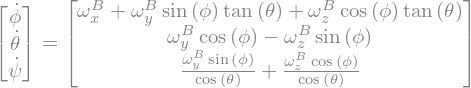

'Posición:'

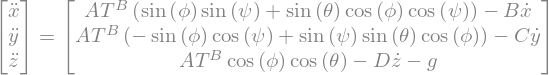

In [926]:
orientacion = (orientacion).subs([(beta,0), (delta,0)])

orientacion_relations = smp.Eq(deta, W_inv*omega)

display("Ecuaciones del movimiento escritas en términos de contantes y las fuerzas y toques como entradas:")
display("Orientación:")
display(orientacion)
display(orientacion_relations)
display("Posición:")
display(posicion)

A las ecuaciones anteriores hay que escribirlas como un sistema de ecuaciones diferenciales de primer orden

'A las ecuaciones anteriores hay que escribirlas como un sistema de ecuaciones diferenciales de primer orden'

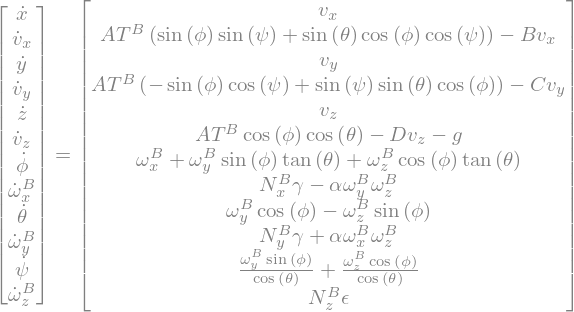

In [927]:
vx,vy,vz = dynamicsymbols(r'v_x, v_y, v_z')
state_vector = smp.Matrix([x, vx, y, vy, z, vz, phi,omx,theta,omy, psi,omz])
inputs_vector = smp.Matrix([T,Nx,Ny,Nz])

dstate_vector = smp.diff(state_vector, t)

equ = smp.Eq(dstate_vector, smp.Matrix([
	vx,
	posicion.rhs[0].subs([(x.diff(t),vx),(y.diff(t),vy),(z.diff(t),vz)]),
	vy,
	posicion.rhs[1].subs([(x.diff(t),vx),(y.diff(t),vy),(z.diff(t),vz)]),
	vz,
	posicion.rhs[2].subs([(x.diff(t),vx),(y.diff(t),vy),(z.diff(t),vz)]),
	orientacion_relations.rhs[0],
	orientacion.rhs[0],
	orientacion_relations.rhs[1],
	orientacion.rhs[1],
	orientacion_relations.rhs[2],
	orientacion.rhs[2]
]))

display("A las ecuaciones anteriores hay que escribirlas como un sistema de ecuaciones diferenciales de primer orden")
display(equ)

'El estado de equilibrio considerado es:'

'Estado:'

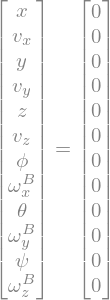

'Entradas:'

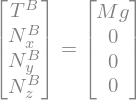

'Matrices del sistema linealizado alrededor del punto de equilibrio:'

'Matriz A:'

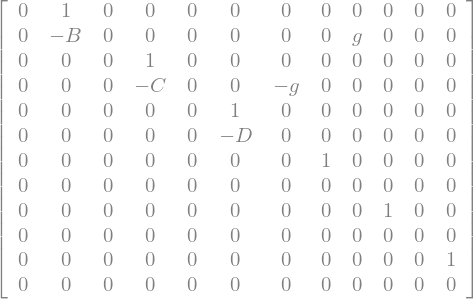

'Matriz B:'

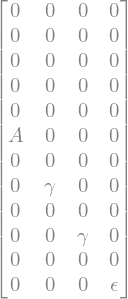

'Donde la dinámica del sistema linealizado está dada por:'

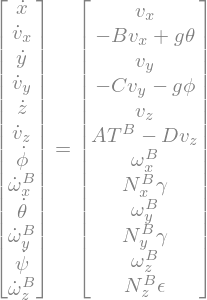

In [928]:
state_vector_0 = smp.Matrix([0,0,0,0,0,0,0,0,0,0,0,0])
inputs_vector_0 = smp.Matrix([M*g,0,0,0])

A_matrix = equ.rhs.jacobian(state_vector)
A_matrix = A_matrix.subs(list(zip(state_vector, state_vector_0)) + list(zip(inputs_vector, inputs_vector_0)))
A_matrix = A_matrix.subs(A,1/M)


B_matrix = equ.rhs.jacobian(inputs_vector)
B_matrix = B_matrix.subs(list(zip(state_vector, state_vector_0)) + list(zip(inputs_vector, inputs_vector_0)))


linearized_system = smp.Eq(dstate_vector, A_matrix*state_vector + B_matrix*inputs_vector)

display("El estado de equilibrio considerado es:")
display("Estado:")
display(smp.Eq(state_vector,state_vector_0))
display("Entradas:")
display(smp.Eq(inputs_vector,inputs_vector_0))
display("Matrices del sistema linealizado alrededor del punto de equilibrio:")
display("Matriz A:")
display(A_matrix)
display("Matriz B:")
display(B_matrix)	
display("Donde la dinámica del sistema linealizado está dada por:")
display(linearized_system)

Las salidas se considerarán como todos los datos del vector de estados y ahora se buscará la matriz de transferencia del sistema

In [929]:
print(smp.latex(linearized_system))

\left[\begin{matrix}\frac{d}{d t} x{\left(t \right)}\\\frac{d}{d t} v_{x}{\left(t \right)}\\\frac{d}{d t} y{\left(t \right)}\\\frac{d}{d t} v_{y}{\left(t \right)}\\\frac{d}{d t} z{\left(t \right)}\\\frac{d}{d t} v_{z}{\left(t \right)}\\\frac{d}{d t} \phi{\left(t \right)}\\\frac{d}{d t} \omega_{x}^{B}{\left(t \right)}\\\frac{d}{d t} \theta{\left(t \right)}\\\frac{d}{d t} \omega_{y}^{B}{\left(t \right)}\\\frac{d}{d t} \psi{\left(t \right)}\\\frac{d}{d t} \omega_{z}^{B}{\left(t \right)}\end{matrix}\right] = \left[\begin{matrix}v_{x}{\left(t \right)}\\- B v_{x}{\left(t \right)} + g \theta{\left(t \right)}\\v_{y}{\left(t \right)}\\- C v_{y}{\left(t \right)} - g \phi{\left(t \right)}\\v_{z}{\left(t \right)}\\A T^{B} - D v_{z}{\left(t \right)}\\\omega_{x}^{B}{\left(t \right)}\\N_{x}^{B} \gamma\\\omega_{y}^{B}{\left(t \right)}\\N_{y}^{B} \gamma\\\omega_{z}^{B}{\left(t \right)}\\N_{z}^{B} \epsilon\end{matrix}\right]


'Las salidas se considerarán como todos los datos del vector de estados y ahora se buscará la matriz de transferencia del sistema'

'Vector de salidas:'

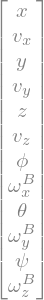

In [930]:
output_vector = state_vector.copy()
display("Las salidas se considerarán como todos los datos del vector de estados y ahora se buscará la matriz de transferencia del sistema")
display("Vector de salidas:")
display(output_vector)

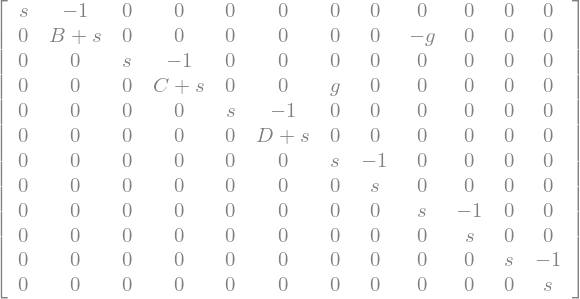

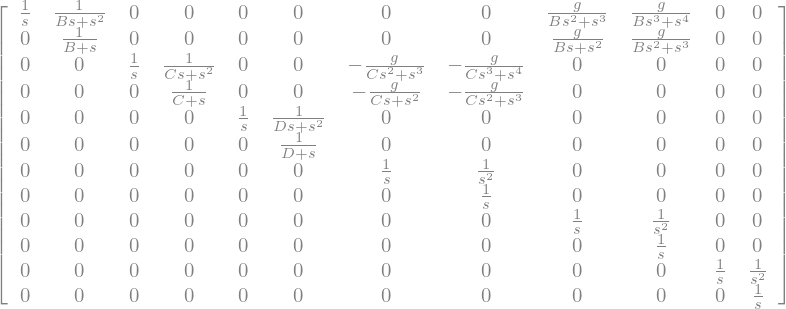

'Matriz de transferencia del sistema linealizado:'

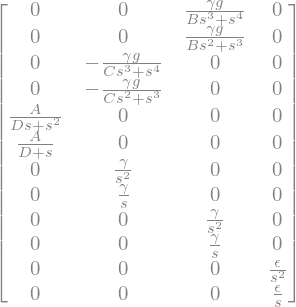

In [931]:
s = smp.symbols('s', complex=True)
G_matrix = (s*smp.eye(len(output_vector)) - A_matrix).inv()*B_matrix


display(s*smp.eye(len(output_vector)) - A_matrix)
display((s*smp.eye(len(output_vector)) - A_matrix).inv())
display("Matriz de transferencia del sistema linealizado:")
display(G_matrix)

## Análisis en el dominio del tiempo

### Comportamiento ante una entrada constante

### Comportamiento ante una perturbación (delta de dirac)

## Análisis en el dominio de la frecuencia

### Diagrama de Bode

In [932]:
# Valores numéricos de los parámetros
params = {
	g:9.81,
	A: 1/2.0,
	B: 0.1,
	C: 0.1,
	D: 0.1,
	alpha: 0.0,
	beta: 0.0,
	gamma: 1/(0.02),
	delta: 0.0,
	epsilon: 1/(0.03)
}
G = convert_sympy_tf_matrix(G_matrix, subs_dict=params, s_symbol=s,
							return_type="tf", as_ndarray=False)


[INFO] Conversión completada. Matriz obtenida:
[TransferFunction(
array([0.]),
array([1.]),
dt=None,
outputs=1, inputs=1), TransferFunction(
array([0.]),
array([1.]),
dt=None,
outputs=1, inputs=1), TransferFunction(
array([490.5]),
array([1. , 0.1, 0. , 0. , 0. ]),
outputs=1, inputs=1), TransferFunction(
array([0.]),
array([1.]),
dt=None,
outputs=1, inputs=1)]
[TransferFunction(
array([0.]),
array([1.]),
dt=None,
outputs=1, inputs=1), TransferFunction(
array([0.]),
array([1.]),
dt=None,
outputs=1, inputs=1), TransferFunction(
array([490.5]),
array([1. , 0.1, 0. , 0. ]),
outputs=1, inputs=1), TransferFunction(
array([0.]),
array([1.]),
dt=None,
outputs=1, inputs=1)]
[TransferFunction(
array([0.]),
array([1.]),
dt=None,
outputs=1, inputs=1), TransferFunction(
array([-490.5]),
array([1. , 0.1, 0. , 0. , 0. ]),
outputs=1, inputs=1), TransferFunction(
array([0.]),
array([1.]),
dt=None,
outputs=1, inputs=1), TransferFunction(
array([0.]),
array([1.]),
dt=None,
outputs=1, inputs=1)]
[Transfe

Diagramas de Bode para los funciones de transferencia de posición

<>:34: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_14924/1452290586.py:34: SyntaxWarning: invalid escape sequence '\c'
  ax_phases[i].set_ylabel("Fase [$^{\circ}$]")


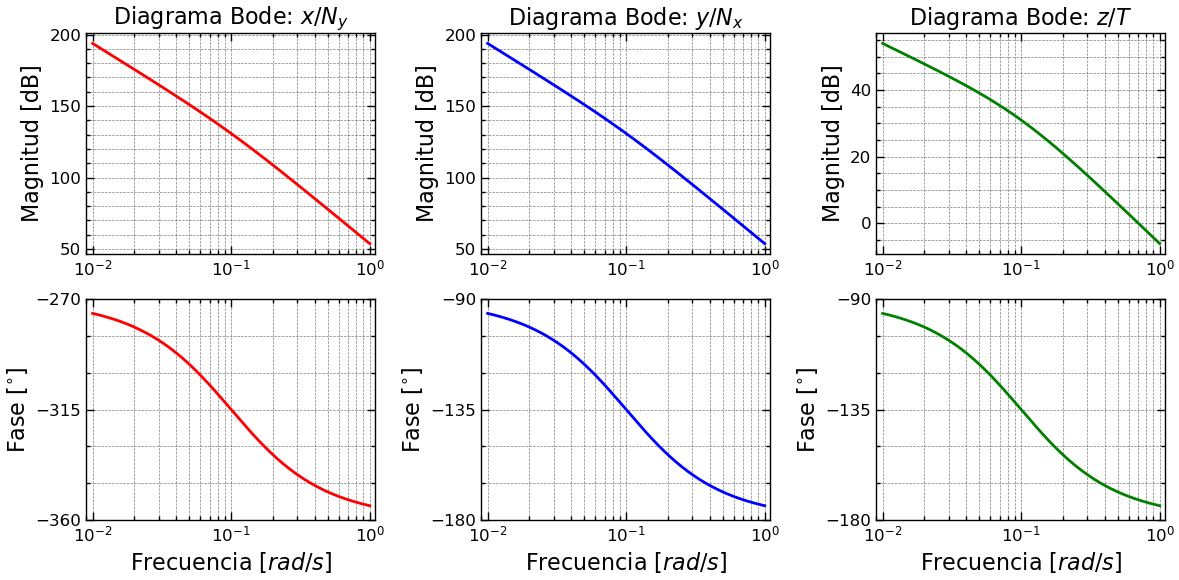

In [985]:
fig, (ax_mags, ax_phases) = plt.subplots(2, 3, figsize=(12, 6))

# Generar los bode plots para las funciones de transferencia seleccionadas
ctl.bode_plot(
	G[0][2],
	dB=True,
	ax=(ax_mags[0], ax_phases[0])
)

ctl.bode_plot(
	G[2][1],
	dB=True,
	ax=(ax_mags[1], ax_phases[1])
)

ctl.bode_plot(
	G[4][0],
	dB=True,
	ax=(ax_mags[2], ax_phases[2])
)

# Personalizacion
ax_mags[0].set_title(r'Diagrama Bode: $x/N_y$')
ax_mags[1].set_title(r'Diagrama Bode: $y/N_x$')
ax_mags[2].set_title(r'Diagrama Bode: $z/T$')

wmin, wmax = 0.009, 1.1

color = ['red', 'blue', 'green']
for i in range(3):
	ax_mags[i].set_xlim(wmin, wmax)
	ax_phases[i].set_xlim(wmin, wmax)
	ax_mags[i].set_ylabel("Magnitud [dB]")
	ax_phases[i].set_ylabel("Fase [$^{\circ}$]")
	ax_phases[i].set_xlabel(r"Frecuencia [$rad/s$]")
	ax_mags[i].tick_params(which='both', labelsize = 12)
	ax_phases[i].tick_params(which='both', labelsize = 12)
	ax_mags[i].lines[0].set_color(color[i])
	ax_phases[i].lines[0].set_color(color[i])


fig.tight_layout()
fig.savefig("bode_plots_position.png", dpi=300)

Diagramas de Bode para las funciones de transferencia de orientación

<>:34: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_14924/3605687053.py:34: SyntaxWarning: invalid escape sequence '\c'
  ax_phases[i].set_ylabel("Fase [$^{\circ}$]")


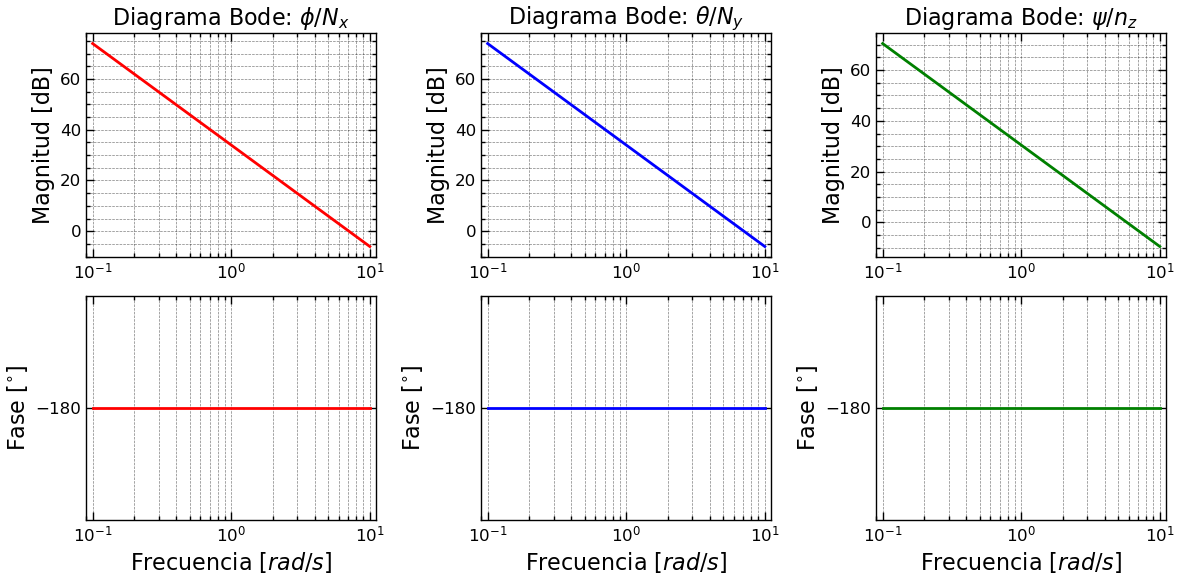

In [984]:
fig, (ax_mags, ax_phases) = plt.subplots(2, 3, figsize=(12, 6))

# Generar los bode plots para las funciones de transferencia seleccionadas
ctl.bode_plot(
	G[6][1],
	dB=True,
	ax=(ax_mags[0], ax_phases[0])
)

ctl.bode_plot(
	G[8][2],
	dB=True,
	ax=(ax_mags[1], ax_phases[1])
)

ctl.bode_plot(
	G[10][3],
	dB=True,
	ax=(ax_mags[2], ax_phases[2])
)

# Personalizacion
ax_mags[0].set_title(r'Diagrama Bode: $\phi/N_x$')
ax_mags[1].set_title(r'Diagrama Bode: $\theta/N_y$')
ax_mags[2].set_title(r'Diagrama Bode: $\psi/n_z$')

wmin, wmax = 0.09, 11

color = ['red', 'blue', 'green']
for i in range(3):
	ax_mags[i].set_xlim(wmin, wmax)
	ax_phases[i].set_xlim(wmin, wmax)
	ax_mags[i].set_ylabel("Magnitud [dB]")
	ax_phases[i].set_ylabel("Fase [$^{\circ}$]")
	ax_phases[i].set_xlabel(r"Frecuencia [$rad/s$]")
	ax_mags[i].tick_params(which='both', labelsize = 12)
	ax_phases[i].tick_params(which='both', labelsize = 12)
	ax_mags[i].lines[0].set_color(color[i])
	ax_phases[i].lines[0].set_color(color[i])


fig.tight_layout()
fig.savefig("bode_plots_orientation.png", dpi=300)

### Diagrama de Nyquist

Diagrama de Nyquist para las funciones de transferencia de la posición

/tmp/ipykernel_14924/1559195223.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


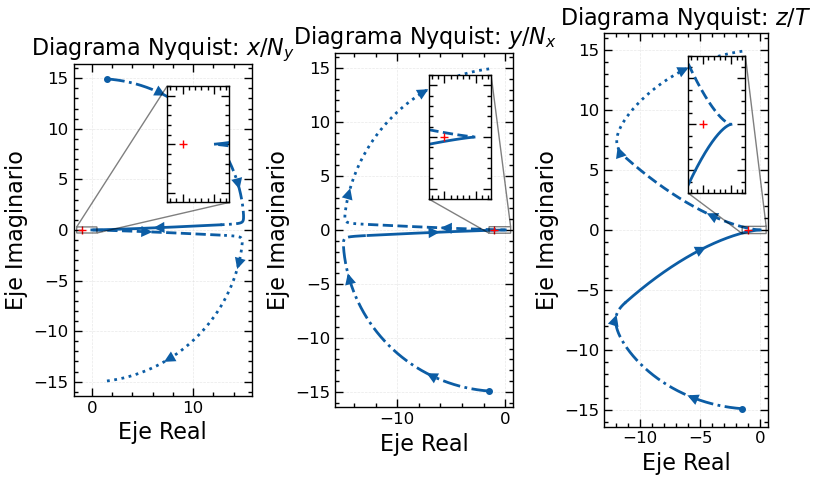

In [981]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(1, 3, figsize=(8, 5))

# Generar los bode plots para las funciones de transferencia seleccionadas
w = np.concatenate([
    np.logspace(-2,  2, 15000),
    np.logspace(2,   4, 5000)
])
ctl.nyquist_plot(
	G[0][2],
	ax=ax[0],omega=w
)

ctl.nyquist_plot(
	G[2][1],
	ax=ax[1], omega=w
)

ctl.nyquist_plot(
	G[4][0],
	ax=ax[2], omega=w
)

# Personalizacion
ax[0].set_title(r'Diagrama Nyquist: $x/N_y$')
ax[1].set_title(r'Diagrama Nyquist: $y/N_x$')
ax[2].set_title(r'Diagrama Nyquist: $z/T$')

wmin, wmax = 0.009, 1.1

color = ['red', 'blue', 'green']
for i in range(3):
	ax[i].set_ylabel("Eje Imaginario")
	ax[i].set_xlabel(r"Eje Real")
	ax[i].tick_params(which='both', labelsize = 12)
	#ax[i].lines[0].set_color(color[i])
	ax[i].set_aspect('equal', adjustable='box')
	# --- Crear el inset/zoom ---
	inset = inset_axes(
		ax[i],
		width="35%",   # ancho relativo al eje principal
		height="35%",  # alto relativo
		loc='upper right',  # esquina donde se coloca
		borderpad=1
	)

	# Dibujar Nyquist de nuevo en el inset
	ctl.nyquist_plot(
		[G[0][2], G[2][1], G[4][0]][i],
		ax=inset
	)

	# Límites del zoom (ajústalos como querás)
	inset.set_xlim(-1.5, 0.5)
	inset.set_ylim(-0.3, 0.3)

	# Quitar grid si estorba
	inset.grid(False)

	# Hacer ticks más pequeños
	inset.tick_params(labelleft=False, labelbottom=False)
	inset.set_xlabel("")
	inset.set_ylabel("")
	ax[i].indicate_inset_zoom(inset, edgecolor="black")


fig.tight_layout()
fig.savefig("nyquist_plots_position.png", dpi=300)

Diagrama de Nyquist para las funciones de transferencia de la orientación

/tmp/ipykernel_14924/2244972950.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


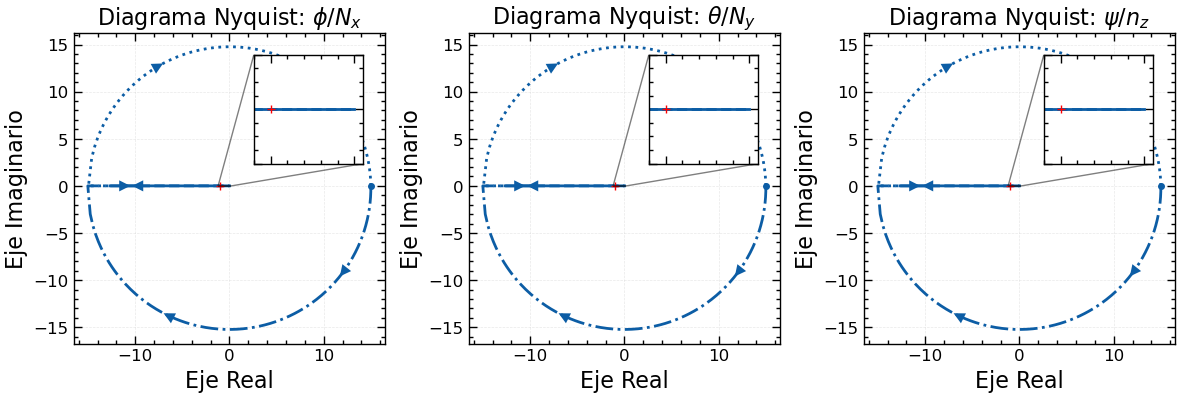

In [983]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

# Generar los bode plots para las funciones de transferencia seleccionadas
ctl.nyquist_plot(
	G[6][1],
	ax=ax[0]
)

ctl.nyquist_plot(
	G[8][2],
	ax=ax[1]
)

ctl.nyquist_plot(
	G[10][3],
	ax=ax[2]
)

# Personalizacion
ax[0].set_title(r'Diagrama Nyquist: $\phi/N_x$')
ax[1].set_title(r'Diagrama Nyquist: $\theta/N_y$')
ax[2].set_title(r'Diagrama Nyquist: $\psi/n_z$')

wmin, wmax = 0.009, 1.1

color = ['red', 'blue', 'green']
for i in range(3):
	ax[i].set_ylabel("Eje Imaginario")
	ax[i].set_xlabel(r"Eje Real")
	ax[i].tick_params(which='both', labelsize = 12)
	#ax[i].lines[:].set_color(color[i])
	ax[i].set_aspect('equal', adjustable='box')
	# --- Crear el inset/zoom ---
	inset = inset_axes(
		ax[i],
		width="35%",   # ancho relativo al eje principal
		height="35%",  # alto relativo
		loc='upper right',  # esquina donde se coloca
		borderpad=1
	)

	# Dibujar Nyquist de nuevo en el inset
	ctl.nyquist_plot(
		[G[6][1], G[8][2], G[10][3]][i],
		ax=inset
	)

	# Límites del zoom (ajústalos como querás)
	inset.set_xlim(-1.2, 0.1)
	inset.set_ylim(-0.02, 0.02)

	# Quitar grid si estorba
	inset.grid(False)

	# Hacer ticks más pequeños
	inset.tick_params(labelleft=False, labelbottom=False)
	inset.set_xlabel("")
	inset.set_ylabel("")
	ax[i].indicate_inset_zoom(inset, edgecolor="black")




fig.tight_layout()
fig.savefig("nyquist_plots_orientation.png", dpi=300)

# Controlador
